<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/wide_and_deep_ann_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# content
- we will learn to use funnctional api to create model

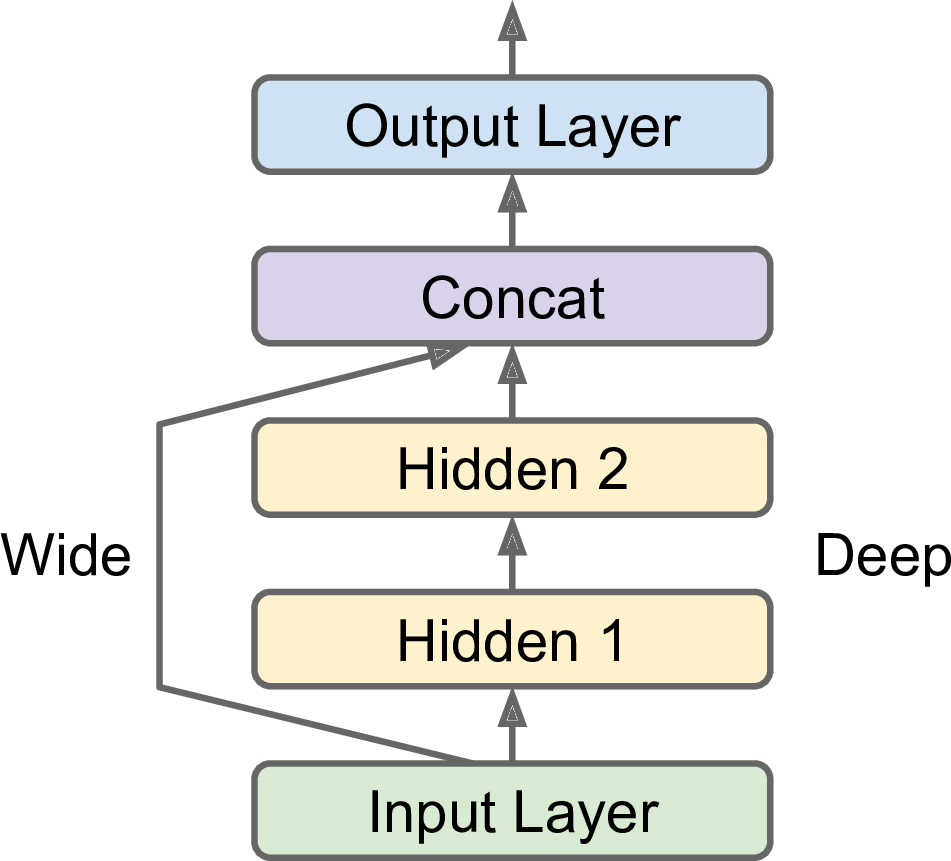

In [28]:
from IPython.display import Image
Image("/content/mls2_1014.png", width=500)

# import

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [0]:
# dataset
from sklearn.datasets import fetch_california_housing

# model
from keras import Model
# layer
from keras.layers import Input, Dense, Concatenate
# activation
from keras.activations import relu
# optimization
from keras.optimizers import adam
# loss
from keras.losses import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data

In [5]:
dataset = fetch_california_housing()

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [0]:
X = dataset.data
y = dataset.target

# spilt the data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(13209, 8)

In [14]:
X_train.shape[1:]

(8,)

# standardized

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

# build the ann

In [23]:
input_ = Input(shape=[8])
hidden1 = Dense(units=300, activation=relu)(input_)
hidden2 = Dense(units=100, activation=relu)(hidden1)
concat = Concatenate()([input_, hidden2])
output = Dense(units=1)(concat)
model = Model(input=[input_], output=[output])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  


In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 300)          2700        input_9[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 100)          30100       dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 108)          0           input_9[0][0]                    
                                                                 dense_10[0][0]             

# compile the model

In [0]:
model.compile(optimizer='adam', loss=mean_squared_error)

# train the model

In [30]:
history = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=[X_valid, y_valid])

Train on 13209 samples, validate on 3303 samples
Epoch 1/10
13209/13209 [==============================] - 0s 32us/step - loss: 0.7902 - val_loss: 0.5011
Epoch 2/10
13209/13209 [==============================] - 0s 31us/step - loss: 0.3832 - val_loss: 0.4044
Epoch 3/10
13209/13209 [==============================] - 0s 28us/step - loss: 0.3562 - val_loss: 0.3749
Epoch 4/10
13209/13209 [==============================] - 0s 28us/step - loss: 0.3452 - val_loss: 0.3751
Epoch 5/10
13209/13209 [==============================] - 0s 28us/step - loss: 0.3359 - val_loss: 0.3874
Epoch 6/10
13209/13209 [==============================] - 0s 26us/step - loss: 0.3341 - val_loss: 0.3710
Epoch 7/10
13209/13209 [==============================] - 0s 28us/step - loss: 0.3186 - val_loss: 0.3671
Epoch 8/10
13209/13209 [==============================] - 0s 30us/step - loss: 0.3158 - val_loss: 0.3806
Epoch 9/10
13209/13209 [==============================] - 0s 28us/step - loss: 0.3087 - val_loss: 0.3701
Epoch 

# evaluate

In [31]:
model.evaluate(X_test, y_test)

4128/4128 [==============================] - 0s 21us/step


0.31373763667751653